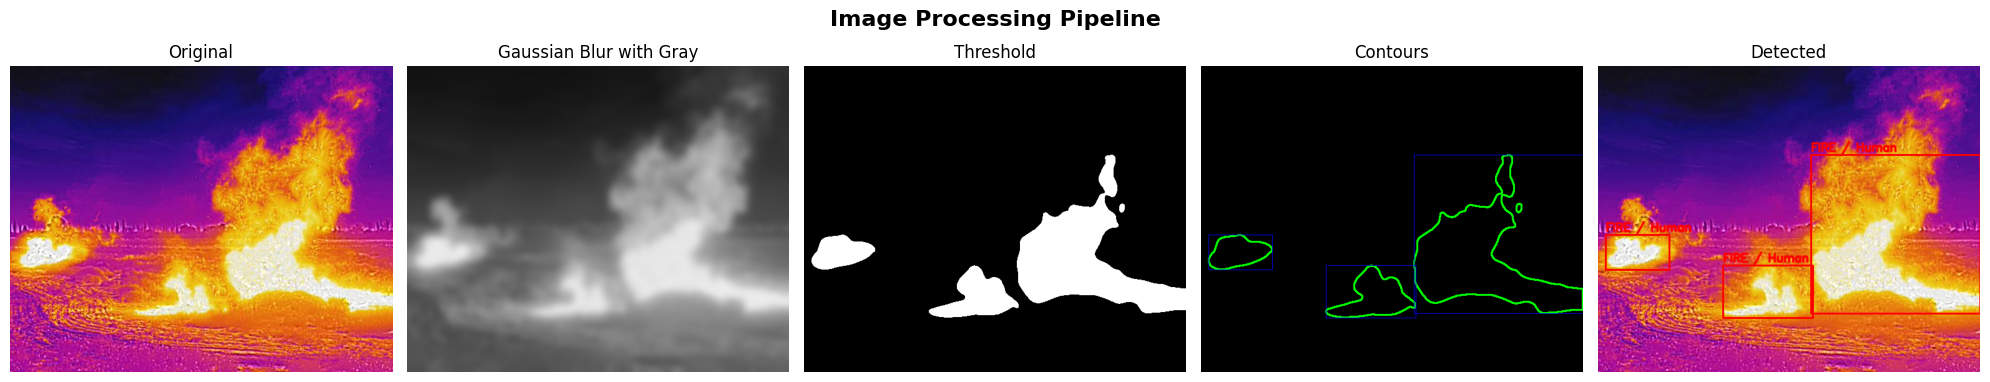

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main(input_filename="ates2.jpg"):
	image = cv2.imread(input_filename)
	if image is None:
		print(f"Error: failed to read image '{input_filename}'")
		return

	# Gaussian blur and threshold
	gray_blur = cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (35, 35), 0)
	_, th = cv2.threshold(gray_blur, 180, 255, cv2.THRESH_BINARY)
	
	# Morphological opening to clean noise
	mask = cv2.morphologyEx(th, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

	# Find and filter contours
	contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	boxes = []
	for cnt in contours:
		area = cv2.contourArea(cnt)
		if area < 200:
			continue
		x, y, w, h = cv2.boundingRect(cnt)
		boxes.append((x, y, w, h))

	# Create visualization panels
	display_blur = cv2.cvtColor(gray_blur, cv2.COLOR_GRAY2BGR)
	display_th = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
	
	# Contour visualization
	display_contour = np.zeros_like(image)
	cv2.drawContours(display_contour, contours, -1, (0, 255, 0), 2)
	for x, y, w, h in boxes:
		cv2.rectangle(display_contour, (x, y), (x + w, y + h), (255, 0, 0), 1)
	
	# Detection visualization
	display_fire = image.copy()
	for x, y, w, h in boxes:
		cv2.rectangle(display_fire, (x, y), (x + w, y + h), (0, 0, 255), 2)
		cv2.putText(display_fire, "FIRE / Human", (x, max(y - 6, 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2, cv2.LINE_AA)

	# Convert BGR to RGB for matplotlib
	panels = [
		cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
		cv2.cvtColor(display_blur, cv2.COLOR_BGR2RGB),
		cv2.cvtColor(display_th, cv2.COLOR_BGR2RGB),
		cv2.cvtColor(display_contour, cv2.COLOR_BGR2RGB),
		cv2.cvtColor(display_fire, cv2.COLOR_BGR2RGB)
	]
	titles = ['Original', 'Gaussian Blur with Gray', 'Threshold', 'Contours', 'Detected']
	
	# Display panels side by side
	fig, axes = plt.subplots(1, 5, figsize=(20, 4))
	fig.suptitle('Image Processing Pipeline', fontsize=16, fontweight='bold')
	
	for ax, panel, title in zip(axes, panels, titles):
		ax.imshow(panel)
		ax.set_title(title, fontsize=12)
		ax.axis('off')
	
	plt.tight_layout()
	plt.show()

if __name__ == "__main__":
	main()